# 小红书销售额预测分析

## 任务说明

接下来，我会带着你一起进行更加深度的业务分析。本周的任务是协助小红书分析不同的业务决策所带来的销售额变化。说到小红书，是目前非常热门的电商平台，和其他电商平台不同，小红书是从社区起家。在小红书社区，用户通过文字、图片、视频笔记的分享，记录了这个时代年轻人的正能量和美好生活。小红书通过机器学习对海量信息和人进行精准、高效匹配，已累积海量的海外购物数据，分析出最受欢迎的商品及全球购物趋势，并在此基础上把全世界的好东西，以最短的路径、最简洁的方式提供给用户。

## 任务内容

根据用户数据以及消费行为数据，完成以下事项：
- 使用Python建立线性回归模型
- 预测用户的消费金额变化
- 找到对用户消费影响较大的因素

## 任务要求

- 完整的数据分析流程（50%）
    - 数据概况分析
    - 单变量分析
    - 相关与可视化分析
    - 线性回归模型建立、评估与优化
- 准确的数据维度识别与python代码操作（30%）
- 提供对于模型结果的业务结论解读（20%）

## 认识数据

![jupyter](image.png)

## 数据分析流程

![jupyter](image1.png)

## 数据分析思路

![jupyter](image2.png)

# 导入相关库

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['simhei']

# 数据准备和清洗

In [336]:
red = pd.read_csv('小红书数据.csv')

In [337]:
red.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0.0,43.0,0.0,B,4.26,2343.870,0
1,200.99,0.0,34.0,0.0,A,0.94,8539.872,0
2,69.98,0.0,16.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [338]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                  29452 non-null float64
gender                   17723 non-null float64
age                      17723 non-null float64
engaged_last_30          17723 non-null float64
lifecycle                29452 non-null object
days_since_last_order    29452 non-null float64
previous_order_amount    29452 non-null float64
3rd_party_stores         29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


数据类型错误：gender, engaged_last_30

In [339]:
red.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0.0,43.0,0.0,B,4.26,2343.870,0
1,200.99,0.0,34.0,0.0,A,0.94,8539.872,0
2,69.98,0.0,16.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [340]:
red.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,17723.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,397.071515,0.298200,29.419286,0.073069,7.711348,2339.254020,2.286059
std,959.755615,0.457481,9.213604,0.260257,6.489289,2361.572921,3.538219
min,0.020000,0.000000,14.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,0.000000,21.000000,0.000000,2.190000,773.349500,0.000000
50%,175.980000,0.000000,29.000000,0.000000,5.970000,1655.790000,0.000000
75%,498.772500,1.000000,37.000000,0.000000,11.740000,3084.796500,3.000000
max,103466.100000,1.000000,45.000000,1.000000,23.710000,11597.900000,10.000000


In [341]:
# 缺失情况 - 缺失比例
red.isnull().sum()/red.shape[0]

revenue                  0.000000
gender                   0.398241
age                      0.398241
engaged_last_30          0.398241
lifecycle                0.000000
days_since_last_order    0.000000
previous_order_amount    0.000000
3rd_party_stores         0.000000
dtype: float64

gender, age, engaged_last_30有缺失值，但是缺失比例较大，不可以直接删除，gender和engaged_last_30的缺失值用unknown填充，age的缺失值用均值填充

## 处理缺失值

In [342]:
# 填充gender - 类别变量
red_clean = red.copy()
red_clean['gender'] = red_clean['gender'].fillna('unknown')

In [343]:
red_clean['gender'].unique()

array([0.0, 'unknown', 1.0], dtype=object)

In [344]:
# 填充engaged_last_30 - 类别变量
red_clean['engaged_last_30'] = red_clean['engaged_last_30'].fillna('unknown')

In [345]:
red_clean['engaged_last_30'].unique()

array([0.0, 'unknown', 1.0], dtype=object)

In [346]:
# 填充age - 数字变量
red_clean['age'] = red_clean['age'].fillna(red_clean['age'].mean())

In [347]:
red_clean.describe()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000
mean,397.071515,29.419286,7.711348,2339.254020,2.286059
std,959.755615,7.147199,6.489289,2361.572921,3.538219
min,0.020000,14.000000,0.130000,0.000000,0.000000
25%,74.970000,27.000000,2.190000,773.349500,0.000000
50%,175.980000,29.419286,5.970000,1655.790000,0.000000
75%,498.772500,32.000000,11.740000,3084.796500,3.000000
max,103466.100000,45.000000,23.710000,11597.900000,10.000000


- revenue和previous_order_amount的方差过大，有离群点，可能会影响之后的线性回归分析

In [348]:
red_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                  29452 non-null float64
gender                   29452 non-null object
age                      29452 non-null float64
engaged_last_30          29452 non-null object
lifecycle                29452 non-null object
days_since_last_order    29452 non-null float64
previous_order_amount    29452 non-null float64
3rd_party_stores         29452 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB


处理之后再次查看数据信息

- 类别变量有：gender, engaged_last_30, lifecycle
- 数字变量有：revenue, age, days_since_last_order, previous_order_amount, 3rd_party_stores

# 数据探索分析（EDA）

## 查看销售额分布

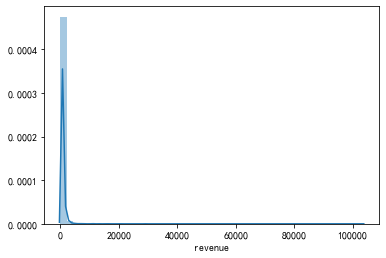

In [349]:
sns.distplot(red_clean['revenue'])

In [350]:
# 取多少数据？1、根据经验 2、列举一些数字，查看它们的记录数
red_clean[red_clean['revenue']<2000].shape

(28866, 8)

In [351]:
red_clean[red_clean['revenue']<1000].shape

(26731, 8)

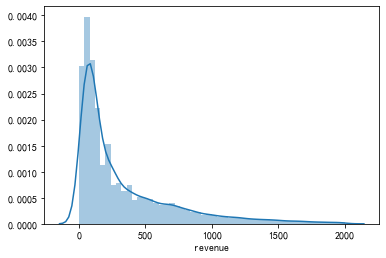

In [352]:
# 只取<2000的数据绘图
sns.distplot(red_clean[red_clean['revenue']<2000]['revenue'])

### 离群值对线性回归的影响

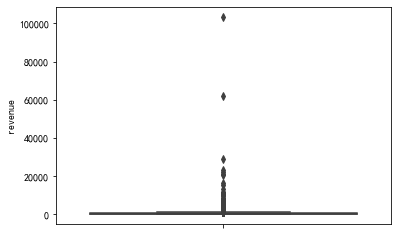

In [353]:
# 箱线图
sns.boxplot(y='revenue', data=red_clean)

一般认为超过75%分位数1.5倍的四分位差的数值为离群值。

四分位差=75%分位数-25%分位数

In [354]:
# 离群范围的计算
quarter_diff = red_clean['revenue'].describe()['75%'] - red_clean['revenue'].describe()['25%']
new_max =  red_clean['revenue'].describe()['75%'] + 1.5 * quarter_diff
new_max

1134.47625

大于new_max的值就可看为离群值

In [355]:
red_clean[red_clean['revenue']>1134].shape[0] / red_clean.shape[0]

0.07357734619041152

离群点数据占了7.4%，可以直接去掉

In [356]:
red_clean = red_clean[red_clean['revenue'] <= 1134]

- 销售额集中在0-1134这个范围内

## 查看年龄的分布情况

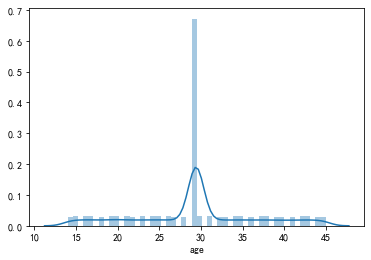

In [357]:
sns.distplot(red_clean['age'])

由于前面使用age的均值填充缺失值，而age的均值为29，所以29的数量会很多，说明用均值填充不一定合理。

## 查看累计购买金额的分布

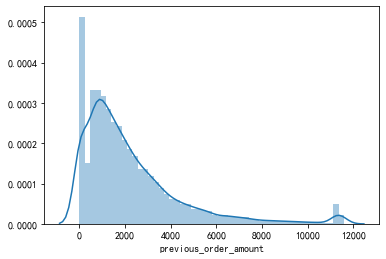

In [358]:
sns.distplot(red_clean['previous_order_amount'])

- 累计金额为0的个数最多，说明这一批数据有一大部分是新用户下单的，在本单之前没有消费过
- 除此之外，累计金额主要分布在0-10000之间
- 在11000左右有一些离群点，在之后的模型调优时再删除看看效果

## 查看最近一次下单距今的天数的分布

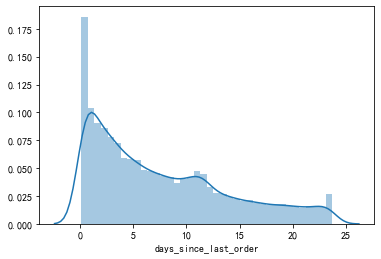

In [359]:
sns.distplot(red_clean['days_since_last_order'])

- 最近一次下单时间在当天内的数量最多
- 主要分布在0-23天之间

## 查看第三方购买次数的分布

d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


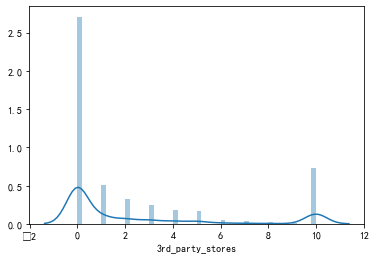

In [360]:
sns.distplot(red_clean['3rd_party_stores'])

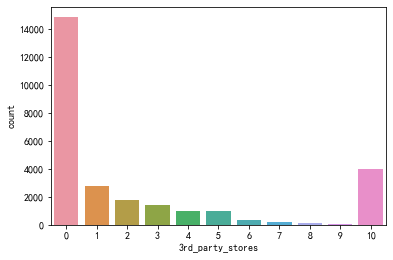

In [361]:
sns.countplot(x='3rd_party_stores', data=red_clean)

- 主要分布在0-8之间
- 未在第三方APP购买的用户最多
- 可以在后续处理中把该变量转换为类别变量，并分段，0为一类，1-9为一类，10为一类

## 不同性别的销售情况

In [362]:
red_clean['gender'].value_counts()

0.0        11582
unknown    10827
1.0         4876
Name: gender, dtype: int64

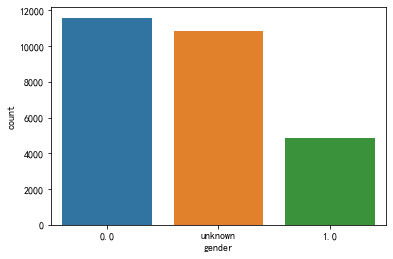

In [363]:
sns.countplot(x='gender', data=red_clean)

- 订单中女性用户数量最多
- 订单中性别未知的用户数量也很多，可能是在注册时用户没有填写这方面的信息

In [364]:
red_clean.groupby(['gender'])['revenue'].sum()

gender
0.0        3036438.980
1.0        1312874.185
unknown    2977115.725
Name: revenue, dtype: float64

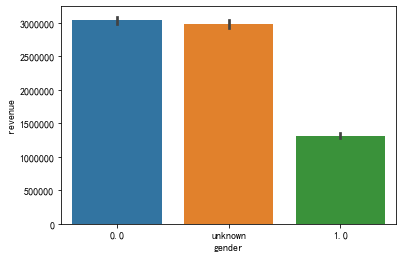

In [365]:
sns.barplot(y='revenue', x='gender', data=red_clean, estimator=sum)

- 女性用户的销售额最高，未知性别用户的销售额和女性用户相当

## 不同生命周期的销售情况

In [366]:
red_clean['lifecycle'].value_counts()

C    18705
B     5309
A     3271
Name: lifecycle, dtype: int64

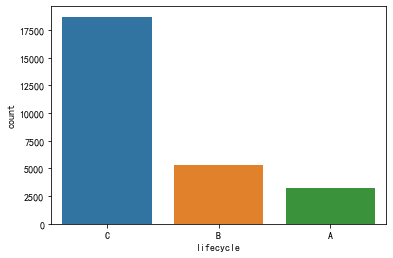

In [367]:
sns.countplot(x='lifecycle', data=red_clean, order=red_clean['lifecycle'].value_counts().sort_values(ascending=False).index)

- 2年内的用户下单最多，然后是1年内的用户和半年内用户

In [368]:
red_clean.groupby(['lifecycle'])['revenue'].sum()

lifecycle
A    8.400446e+05
B    1.399085e+06
C    5.087299e+06
Name: revenue, dtype: float64

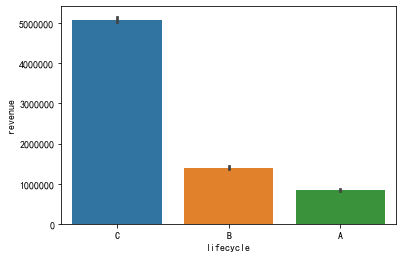

In [369]:
sns.barplot(x='lifecycle', y='revenue', data=red_clean, estimator=sum, order=red_clean.groupby(['lifecycle'])['revenue'].sum().sort_values(ascending=False).index)

- 2年内的用户的销售额最高

## 不同参与情况的用户的销售情况

In [370]:
red_clean['engaged_last_30'].value_counts()

0.0        15308
unknown    10827
1.0         1150
Name: engaged_last_30, dtype: int64

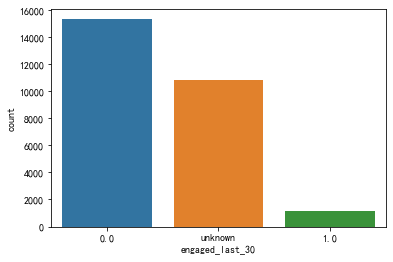

In [371]:
sns.countplot(x='engaged_last_30', data=red_clean)

- 订单中大部分用户在最近30天没有参与过重要活动
- 参与情况未知的用户数量也很多

In [372]:
red_clean.groupby(['engaged_last_30'])['revenue'].sum()

engaged_last_30
0.0        3.963249e+06
1.0        3.860637e+05
unknown    2.977116e+06
Name: revenue, dtype: float64

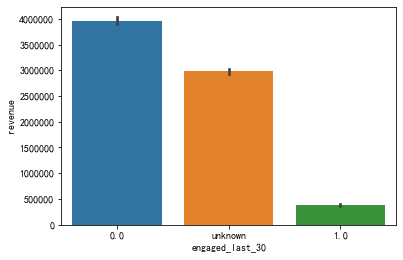

In [373]:
sns.barplot(x='engaged_last_30', y='revenue', data=red_clean, estimator=sum, order=red_clean.groupby(['engaged_last_30'])['revenue'].sum().sort_values(ascending=False).index)

- 最近30天内未参加过活动的用户的销售额最高，其次是参与情况未知的用户，而参与了的用户的销售额最低
- 说明活动的宣传力度还不够大

# 任务问题

- 计算revenue和其他变量的相关系数
- 找到相关性最高的几个变量和revenue做线性回归分析
    - 模型建立
    - 模型评估
    - 模型优化
        - 添加变量
        - 缺失值填充调整
- 找到对用户消费影响较大的因素


## 计算revenue和其他变量的相关系数

In [374]:
red_clean.corr()[['revenue']].sort_values('revenue', ascending=False)

,revenue
revenue,1.000000
previous_order_amount,0.143960
days_since_last_order,0.107258
age,0.001330
3rd_party_stores,-0.057896


- 这些变量与revenue的相关系数都很低
- 用一条直线无法代表变量和revenue的关系

## 可视化分析

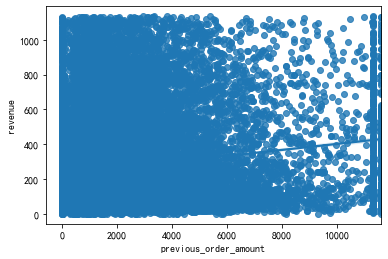

In [375]:
sns.regplot(x='previous_order_amount', y='revenue', data=red_clean)

- 可以看出来，previous_order_amount和revenue的相关性很弱
- 数据集中在左边，说明累计金额不会很大，最右边有些离群点

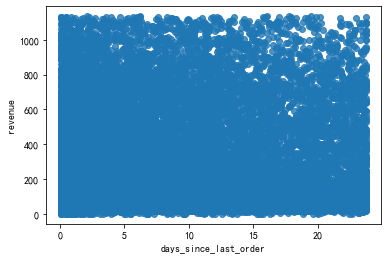

In [376]:
sns.regplot(x='days_since_last_order', y='revenue', data=red_clean)

- 横着看，不管days_since_last_order多大，revenue都没啥区别
- 竖着看，revenue高的地方较稀疏

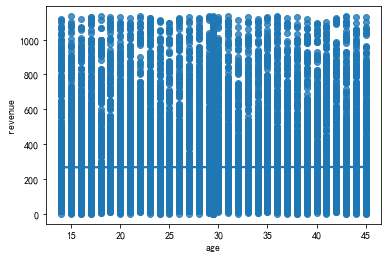

In [377]:
sns.regplot(x='age', y='revenue', data=red_clean)

- 没看出来什么

## 建立回归模型

In [378]:
from sklearn.linear_model import LinearRegression

In [379]:
# 把类别变量变为哑变量
red_clean = pd.get_dummies(red_clean)

In [380]:
red_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27285 entries, 0 to 29451
Data columns (total 14 columns):
revenue                    27285 non-null float64
age                        27285 non-null float64
days_since_last_order      27285 non-null float64
previous_order_amount      27285 non-null float64
3rd_party_stores           27285 non-null int64
gender_0.0                 27285 non-null uint8
gender_1.0                 27285 non-null uint8
gender_unknown             27285 non-null uint8
engaged_last_30_0.0        27285 non-null uint8
engaged_last_30_1.0        27285 non-null uint8
engaged_last_30_unknown    27285 non-null uint8
lifecycle_A                27285 non-null uint8
lifecycle_B                27285 non-null uint8
lifecycle_C                27285 non-null uint8
dtypes: float64(4), int64(1), uint8(9)
memory usage: 2.7 MB


In [381]:
y = red_clean['revenue']
x = red_clean[['previous_order_amount', 'days_since_last_order', 'age']]
# x = red_clean.drop('revenue', axis=1)


In [382]:
model = LinearRegression()

In [383]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [384]:
score = model.score(x, y)
score

0.03506013495877147

## 模型评估

In [385]:
predictions=model.predict(x)  # 计算y预测值
error=predictions-y  # 计算误差
rmse=(error**2).mean()**.5  # 计算rmse
mae=abs(error).mean()  # 计算mae
print(rmse)
print(mae)

263.219136758036
208.21470710106811


## 模型优化

- 添加变量
- 缺失值填充调整
- 累计购买金额离群值删除

### 添加变量

In [386]:
# 添加变量 - gender
x = red_clean[['previous_order_amount', 'days_since_last_order', 'age', 'gender_0.0', 'gender_1.0', 'gender_unknown']]
model.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [387]:
model.score(x, y)

0.03563759957752688

- 添加了gender后比前面好了一点

In [388]:
# 添加变量 - engaged_last_30
x = red_clean[['previous_order_amount', 'days_since_last_order', 'age', 'gender_0.0', 'gender_1.0', 'gender_unknown', 'engaged_last_30_0.0', 'engaged_last_30_1.0', 'engaged_last_30_unknown']]
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [389]:
model.score(x, y)

0.03701645253162833

- 添加了engaged_last_30后又好了一点

In [390]:
# 添加变量 - lifecycle
x = red_clean[['previous_order_amount', 'days_since_last_order', 'age', 'gender_0.0', 'gender_1.0', 'gender_unknown', 'engaged_last_30_0.0', 'engaged_last_30_1.0', 'engaged_last_30_unknown', 'lifecycle_A', 'lifecycle_B', 'lifecycle_C']]
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [391]:
model.score(x, y)

0.03880494743958063

- 添加了lifecycle后又好了一点

In [392]:
# 添加变量 - 3rd_party_stores
x = red_clean[['previous_order_amount', 'days_since_last_order', 'age', 'gender_0.0', 'gender_1.0', 'gender_unknown', 'engaged_last_30_0.0', 'engaged_last_30_1.0', 'engaged_last_30_unknown', 'lifecycle_A', 'lifecycle_B', 'lifecycle_C', '3rd_party_stores']]
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [393]:
model.score(x, y)

0.043299688657354785

- 添加3rd_party_stores后又好了一点

### 缺失值填充调整

In [394]:
# age的缺失值用用插值法拟合并填充
red_clean['age'] = red['age'].interpolate()

In [395]:
red_clean['age'].describe()

count    27285.000000
mean        29.416547
std          8.356778
min         14.000000
25%         23.000000
50%         29.333333
75%         36.000000
max         45.000000
Name: age, dtype: float64

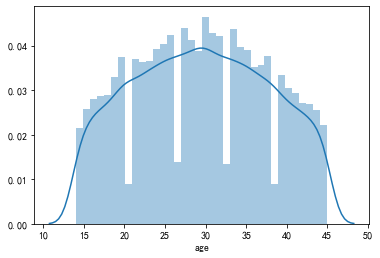

In [396]:
sns.distplot(red_clean['age'])

- 用插值法拟合填充后，age的分布接近正态分布，说明这个方法是较为合理的

In [397]:
x = red_clean[['previous_order_amount', 'days_since_last_order', 'age', 'gender_0.0', 'gender_1.0', 'gender_unknown', 'engaged_last_30_0.0', 'engaged_last_30_1.0', 'engaged_last_30_unknown', 'lifecycle_A', 'lifecycle_B', 'lifecycle_C', '3rd_party_stores']]
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [398]:
model.score(x, y)

0.04338567474796862

### 累计购买金额离群值删除

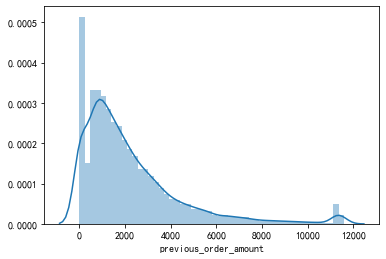

In [399]:
sns.distplot(red_clean['previous_order_amount'])

- 去掉大于10000的数据

In [400]:
red_clean_ = red_clean[red_clean['previous_order_amount']<=10000]

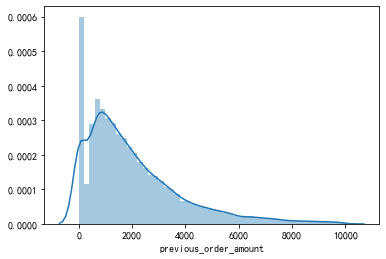

In [401]:
sns.distplot(red_clean_['previous_order_amount'])

In [402]:
x = red_clean_[['previous_order_amount', 'days_since_last_order', 'age', 'gender_0.0', 'gender_1.0', 'gender_unknown', 'engaged_last_30_0.0', 'engaged_last_30_1.0', 'engaged_last_30_unknown', 'lifecycle_A', 'lifecycle_B', 'lifecycle_C', '3rd_party_stores']]
y = red_clean_['revenue']
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
model.score(x, y)

0.03889668606541741

- 删除后反而下降了，还是别删除了

## 模型参数

In [408]:
from statsmodels.formula.api import ols
x = red_clean[['previous_order_amount', 'days_since_last_order', 'age', 'gender_0.0', 'gender_1.0', 'gender_unknown', 'engaged_last_30_0.0', 'engaged_last_30_1.0', 'engaged_last_30_unknown', 'lifecycle_A', 'lifecycle_B', 'lifecycle_C', '3rd_party_stores']]
y = red_clean['revenue']
model_ols=ols('y~x',red_clean).fit() #观察coef-系数,P值显著性
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     137.4
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          8.68e-255
Time:                        23:32:21   Log-Likelihood:            -1.9066e+05
No. Observations:               27285   AIC:                         3.813e+05
Df Residuals:                   27275   BIC:                         3.814e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.5603      3.444     32.396      0.0

# 总结

- 销售额集中在0-1134这个范围内
- 累计金额主要分布在0-1000之间
- 最近一次下单距今的天数主要分布在0-23天之间
- 第三方APP购买次数主要在0-8次之间
- 未在第三方APP购买的用户最多
- 女性用户的销售额最高，未知性别用户的销售额和女性用户相当
- 2年内的用户的销售额最高
- 最近30天内未参加过活动的用户的销售额最高，其次是参与情况未知的用户，而参与了的用户的销售额最低
- 说明活动的宣传力度还不够大
- 线性回归结果表明这些变量与销售额的相关性不是很大，模型拟合的误差较大，score不高